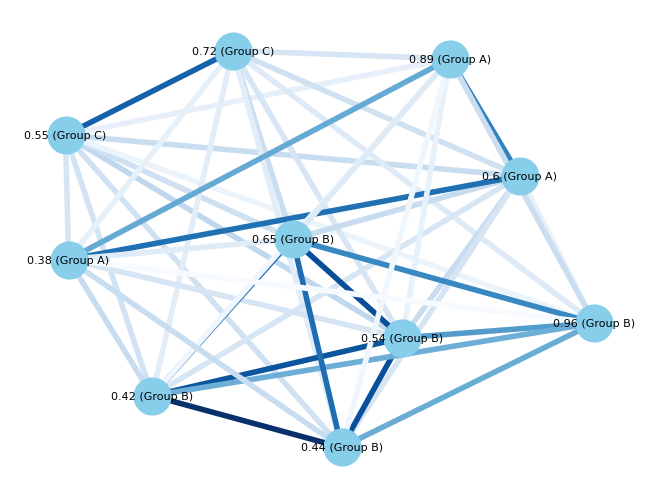

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset
# Assume each data point has a 'value' (continuous) and 'group' (discrete)
np.random.seed(0)
num_points = 10
data = {
    'value': np.random.rand(num_points),
    'group': np.random.choice(['A', 'B', 'C'], num_points)
}

# Step 2: Create a graph
G = nx.Graph()

# Adding nodes with attributes
for i in range(num_points):
    G.add_node(i, value=round(data['value'][i], 2), group=data['group'][i])  # Rounded for better display

# Step 3: Add edges with weights
# Edge weights depend on both 'value' difference and whether nodes share the same 'group'
for i in range(num_points):
    for j in range(i + 1, num_points):
        weight = 1 / (1 + abs(data['value'][i] - data['value'][j]))  # weight based on 'value' difference
        if data['group'][i] == data['group'][j]:
            weight *= 2  # Increase weight if the same group
        G.add_edge(i, j, weight=weight)

# Step 4: Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Draw nodes, edges, and labels
nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=700, edge_color=weights, width=4, edge_cmap=plt.cm.Blues)

# Custom labels with 'value' and 'group'
labels = {i: f"{G.nodes[i]['value']} (Group {G.nodes[i]['group']})" for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

# Show plot
plt.show()
